## **주식의 변동성(Volatility)**
주가는 가격이 아니라 비율로 움직이기 떄문에 평균 수익률이 0이어도 실제 돈은 줄어들 수 있음

📌 이것이 바로: 장기 투자에서 변동성 관리가 중요한 이유
📌 **산술 평균은 착시고, 실제 돈은 복리를 따르고 복리에서는 흔들리기만 해도 손해**

### **젠센의 부등식 (Jensen's Inequality)**
- 주식 가격이 100원에서 시작해서 50% 오르거나 50% 떨어지는 경우

> 상승 시: $100 \times 1.5 = 150$

> 하락 시: $100 \times 0.5 = 50$

>> 산술 평균: $(150 + 50) / 2 = 100$ (변함 없음)하지만

>> 즉 산술평균은 $(1.5 + 0.5) / 2 = 1.00$ (100% 원금확보)

> **금융에서 복리(기하 평균)** 계산하면(2일 동안 연속발생) 상승->하락, 하락->상승의 경우

>> $1.5 \times 0.5 = 0.75$ (상승-하락, 25% 손실, 원금의 75%만 확보)

>> $0.5 \times 1.5 = 0.75$ (하락-상승, 25% 손실, 원금의 75%만 확보)

### 변동성이 큰 경우와 작은 경우 200 T 까지 50를 각각 시물레이션

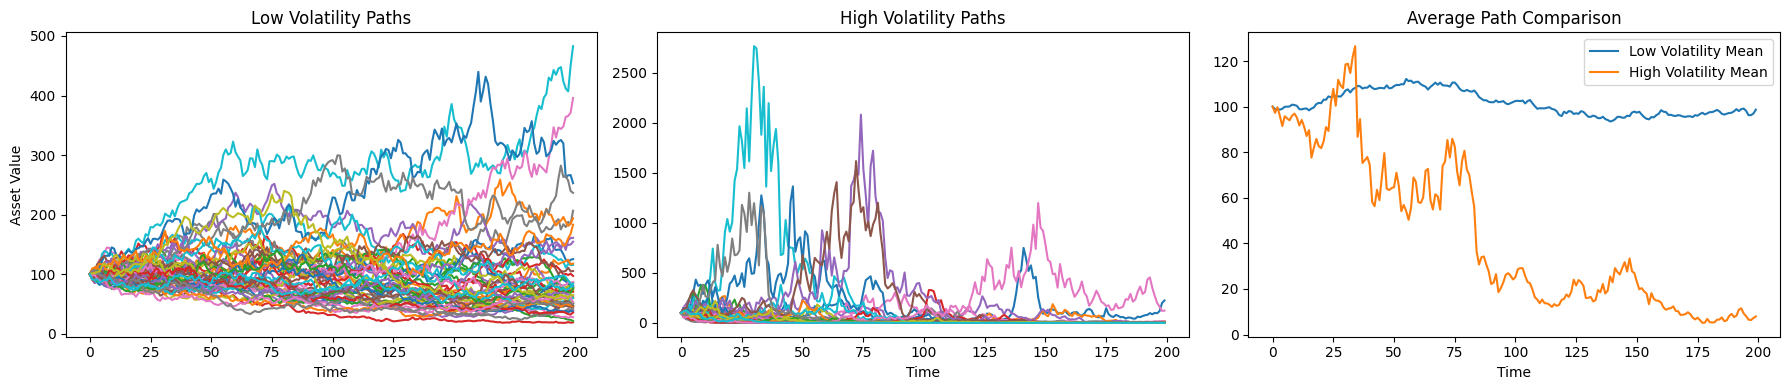

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

T = 200
S0 = 100
mu = 0.0
paths = 50

sigma_low = 0.05
sigma_high = 0.3

def simulate_gbm(mu, sigma, T, S0, paths):
    prices = np.zeros((paths, T))
    prices[:, 0] = S0
    for t in range(1, T):
        z = np.random.randn(paths)
        prices[:, t] = prices[:, t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * z)
    return prices

prices_low = simulate_gbm(mu, sigma_low, T, S0, paths)
prices_high = simulate_gbm(mu, sigma_high, T, S0, paths)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# 1️⃣ Low volatility paths
for i in range(paths):
    axes[0].plot(prices_low[i])
axes[0].set_title("Low Volatility Paths")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Asset Value")

# 2️⃣ High volatility paths
for i in range(paths):
    axes[1].plot(prices_high[i])
axes[1].set_title("High Volatility Paths")
axes[1].set_xlabel("Time")

# 3️⃣ Mean path comparison
axes[2].plot(prices_low.mean(axis=0), label="Low Volatility Mean")
axes[2].plot(prices_high.mean(axis=0), label="High Volatility Mean")
axes[2].set_title("Average Path Comparison")
axes[2].set_xlabel("Time")
axes[2].legend()

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
df_lv = pd.DataFrame(prices_low).round(2)
df_hv = pd.DataFrame(prices_high).round(2)

In [8]:
df_lv.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,100.0,98.861200,98.937400,98.670200,99.062000,99.933800,99.95200,100.059000,100.859000,100.692000,...,97.939600,98.880800,98.032600,98.908000,99.141800,98.122800,96.237800,96.251400,96.95620,98.636600
std,0.0,4.631142,6.610028,7.410016,8.781509,11.596671,13.87025,14.424465,14.443796,15.917149,...,79.683575,83.424517,81.692231,85.142107,85.679704,83.176438,79.961248,80.199789,83.63673,88.704518
min,100.0,90.550000,85.150000,86.350000,82.140000,84.410000,80.48000,78.130000,77.020000,75.340000,...,19.200000,18.940000,20.280000,18.440000,18.630000,18.300000,18.580000,19.620000,18.57000,19.300000
25%,100.0,95.665000,94.725000,93.697500,92.495000,91.615000,90.45500,89.755000,90.022500,89.772500,...,51.480000,52.777500,52.637500,50.802500,50.447500,50.457500,51.697500,52.135000,50.25500,50.005000
50%,100.0,98.710000,99.330000,97.330000,97.915000,97.020000,95.78000,96.435000,99.215000,96.645000,...,71.750000,70.405000,70.400000,69.385000,72.355000,71.625000,70.960000,70.830000,70.91000,74.055000
75%,100.0,101.572500,103.897500,102.837500,104.230000,106.015000,104.36750,105.222500,106.655000,109.425000,...,115.120000,115.667500,112.382500,107.512500,105.515000,103.060000,104.137500,107.837500,103.83250,103.300000
max,100.0,109.570000,111.400000,116.460000,124.560000,133.830000,138.94000,144.600000,144.290000,145.080000,...,425.270000,442.720000,434.800000,445.230000,447.690000,423.730000,411.700000,406.990000,450.45000,482.850000


In [9]:
df_hv.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50.0,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,100.0,97.27040,99.725400,95.856000,91.460800,95.765800,94.824000,94.014600,96.027200,96.91880,...,7.683600,8.269000,10.870800,11.524600,9.251200,8.047200,6.557200,6.337800,7.255600,7.950000
std,0.0,27.34042,36.905626,47.979444,58.839782,71.185256,77.517994,73.737085,80.243942,86.72056,...,41.802646,44.659339,62.092607,65.423513,50.693808,40.417585,30.923219,27.948498,32.482636,35.787431
min,100.0,52.49000,35.310000,30.590000,17.010000,11.750000,10.630000,10.190000,12.590000,6.82000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.0,73.79000,74.207500,56.165000,49.160000,47.917500,37.222500,32.737500,29.197500,31.94250,...,0.000000,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.0,96.37000,94.990000,94.735000,77.715000,82.770000,83.505000,86.690000,81.595000,76.96500,...,0.065000,0.070000,0.065000,0.050000,0.045000,0.040000,0.040000,0.045000,0.040000,0.035000
75%,100.0,116.15500,125.502500,118.180000,115.775000,113.492500,122.057500,123.305000,133.105000,132.33750,...,0.225000,0.212500,0.257500,0.222500,0.257500,0.240000,0.200000,0.180000,0.175000,0.220000
max,100.0,157.98000,188.450000,228.090000,289.070000,327.460000,432.400000,370.280000,381.780000,380.95000,...,289.450000,308.470000,433.740000,454.690000,350.200000,270.200000,198.570000,161.840000,198.430000,223.870000


## 👉 같은 평균, 다른 변동성 → 완전히 다른 장기 결과

- μ = 0.0으로 설정했기 때문에:
>> GBM의 −½σ² 항
- Low volatility: drift = 0 - 0.5 × 0.05² ≈ -0.00125
- High volatility: drift = 0 - 0.5 × 0.3² = -0.045

### 주식의 가격은 기하 브라운 운동(Geometric Brownian Motion, GBM) 모델
- 블랙-숄즈(Black-Scholes) 옵션 가격 모델의 기초가 되는 확률 과정으로, 주식 가격이 로그 정규 분포를 따른다는 가정하에 주가의 변화를 표현

1. 공식 개요
$$S_t = S_0 \exp\left( \left(r - \frac{1}{2}\sigma^2\right)t + \sigma W_t \right)$$

- 시간 $  t  $에서 주식 가격 $  S_t  $가 초기 가격 $  S_0  $를 기반으로 어떻게 변화하는지를 설명
- 주식 가격은 **기대 수익률(드리프트)** 과 **랜덤 변동(확률적 항)** 으로 구성되어 있으며, 이는 주가가 지수적으로 성장하거나 변동하는 것을 반영
- 이 모델은 주가가 음수가 될 수 없고, 백분율 변화(로그 수익률)가 정규 분포를 따른다는 현실적인 가정

2. 각 변수의 의미

- $  S_t  $: 시간 $  t  $에서의 주식 가격. (예: 현재 주가)
- $  S_0  $: 초기 주식 가격 (t=0 시점의 주가).
- $  r  $: 무위험 이자율 (risk-free rate). 연속 복리 기준으로, 주식이 기대되는 성장률을 나타내고. 예를 들어, 국채 수익률처럼 안전한 자산의 수익률.
- $  \sigma  $ (sigma): 주식의 변동성 (volatility). 주가의 불확실성 정도를 측정하며, 연간 표준편차로 표현 (예: σ=0.2라면 연간 20% 변동성을 의미)
- $  t  $: 시간 경과 (보통 년 단위). t가 증가할수록 주가의 불확실성이 커짐
- $  W_t  $: 표준 브라운 운동 (Wiener process) 또는 브라운 운동의 값. 이는 평균 0, 분산 t인 정규 분포를 따르는 랜덤 변수로, 주가의 예측 불가능한 변동을 모델링

>> $  W_t \sim \mathcal{N}(0, t)  $.